<a href="https://colab.research.google.com/github/sirsjosh/Computer-Vision/blob/main/hough_transform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hough Lines**
**Import resources and display the image**

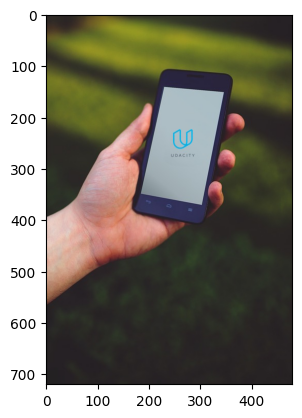

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib

%matplotlib inline

# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_2_Convolutional_Filters_Edge_Detection/images/phone.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
image = cv2.imdecode(arr, -1)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

**Perform edge detection**

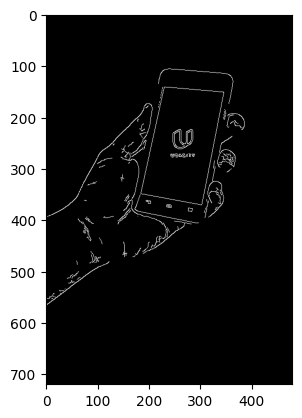

In [2]:
# Convert image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Define our parameters for Canny
low_threshold = 50
high_threshold = 100
edges = cv2.Canny(gray, low_threshold, high_threshold)

plt.imshow(edges, cmap='gray')

**Find lines using a Hough transform**

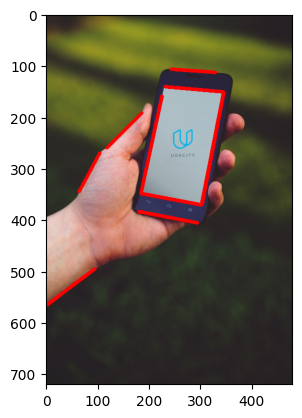

In [3]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1
theta = np.pi/180
threshold = 60
min_line_length = 50
max_line_gap = 5

line_image = np.copy(image) #creating an image copy to draw lines on

# Run Hough on the edge-detected image
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)


# Iterate over the output "lines" and draw lines on the image copy
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)

plt.imshow(line_image)

# Hough Circle Detection

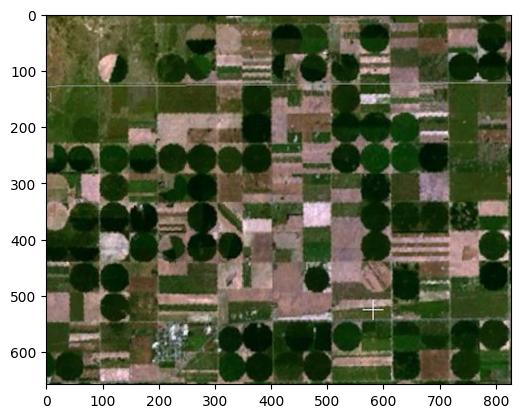

In [4]:
# Read in the image
# Read in the image
url = 'https://github.com/udacity/cd0360-Introduction-to-Computer-Vision/blob/main/1_2_Convolutional_Filters_Edge_Detection/images/round_farms.jpg?raw=true'
req = urllib.request.urlopen(url)
arr = np.asarray(bytearray(req.read()),dtype = np.uint8)
image = cv2.imdecode(arr, -1)

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

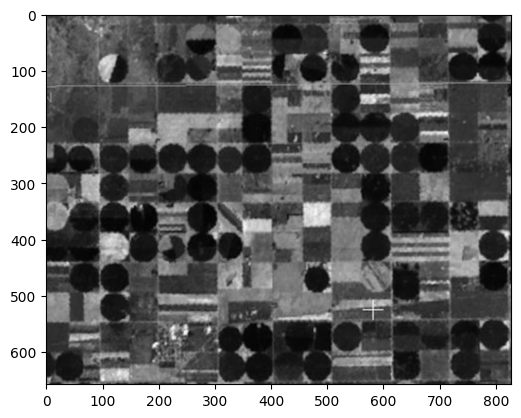

In [6]:
# Gray and blur
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)

plt.imshow(gray_blur, cmap='gray')

**HoughCircles function**

HoughCircles takes in a few things as its arguments:

*   an input image, detection method (Hough gradient), resolution factor between the detection and image (1),
*   minDist - the minimum distance between circles
*   param1 - the higher value for performing Canny edge detection
*   param2 - threshold for circle detection, a smaller value --> more circles will be detected
*   min/max radius for detected circles


The variable you should change will be the last two: min/max radius for detected circles. Take a look at the image above and estimate how many pixels the average circle is in diameter; use this estimate to provide values for min/max arguments. You may also want to see what happens if you change minDist.

Circles shape:  (1, 87, 3)


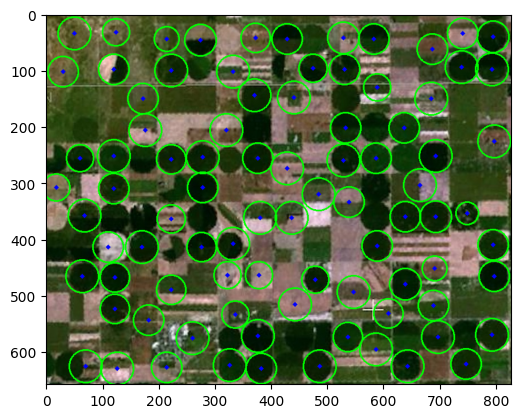

In [19]:
# for drawing circles on
circles_im = np.copy(image)

## TODO: use HoughCircles to detect circles
# right now there are too many, large circles being detected
# try changing the value of maxRadius, minRadius, and minDist
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1,
                           minDist=55,
                           param1=70,
                           param2=11,
                           minRadius=20,
                           maxRadius=30)

# convert circles into expected type
circles = np.uint16(np.around(circles))
# draw each one
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(circles_im,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(circles_im,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(circles_im)

print('Circles shape: ', circles.shape)